# Sobre os dados,

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('precision', 3)

In [2]:
df2019 = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding='latin-1')

In [ ]:
df2019 = pd.read_csv('MICRODADOS_ENEM_2019.csv', nrows=1000000, sep=';', encoding='latin-1').sample(100000)


In [ ]:
df2019.shape


In [ ]:
df2019.head(10)

In [ ]:
df_full = pd.concat([df2018, df2019])

In [ ]:
df_full.head(10)

In [ ]:
df2019 = df2019.query("TP_ESTADO_CIVIL != 'Não informado'")

In [3]:
df2019['TP_ESTADO_CIVIL'] = df2019['TP_ESTADO_CIVIL'].replace([0,1,2,3,4],['Não informado','Solteiro(a)','Casado(a)','Divorciado(a)','Viúvo(a)'])
df2019['TP_LINGUA'] = df2019['TP_LINGUA'].replace([0,1],['Inglês','Espanhol'])
df2019['TP_ANO_CONCLUIU'] = df2019['TP_ANO_CONCLUIU'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14],[2019,'2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006'])
df2019['TP_SEXO'] = df2019['TP_SEXO'].replace(['F','M'],['Feminino','Masculino'])

In [ ]:
df2019.head(10)

In [4]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

df2019["NU_NOTA_FINAL"] = df2019[provas].mean(axis=1)
df2019.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0  190001595656    2019                  3552205                Sorocaba   
1  190001421546    2019                  2910800        Feira de Santana   
2  190001133210    2019                  2304400               Fortaleza   
3  190001199383    2019                  1721000                  Palmas   
4  190001237802    2019                  3118601                Contagem   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE    TP_SEXO TP_ESTADO_CIVIL  \
0                35               SP      36.0  Masculino     Solteiro(a)   
1                29               BA      23.0  Masculino     Solteiro(a)   
2                23               CE      39.0   Feminino     Solteiro(a)   
3                17               TO      25.0   Feminino     Solteiro(a)   
4                31               MG      22.0   Feminino     Solteiro(a)   

   TP_COR_RACA  ...  Q017  Q018 Q019  Q020 Q021  Q022 Q023  Q024  Q025  \
0            3  ...     A     A    A     A    A     C    A     C     B   
1            1  ...     A     A    B     A    A     E    A     A     B   
2            3  ...     A     A    B     A    A     C    A     A     B   
3            1  ...     A     A    C     A    B     D    A     B     B   
4            1  ...     A     A    B     A    A     C    B     B     B   

   NU_NOTA_FINAL  
0            NaN  
1            NaN  
2            NaN  
3         475.34  
4         639.36  

[5 rows x 137 columns]

In [5]:
sigla_estado = df2019['SG_UF_RESIDENCIA'].unique()
sigla_estado.sort()

In [6]:
estudante_por_estado = df2019['SG_UF_RESIDENCIA'].value_counts().sort_index()
ano_prova = df2019['NU_ANO'].value_counts().sort_index()

In [7]:
agg_estudantes_estados_2019 =  df2019.loc[df2019.NU_ANO == 2018].groupby('SG_UF_RESIDENCIA').NU_INSCRICAO.count()
#agg_estudantes_estados_2019 =  df_full.loc[df_full.NU_ANO == 2019].groupby('SG_UF_RESIDENCIA').NU_INSCRICAO.count()

Text(0, 0.5, 'Quantidade de participantes')

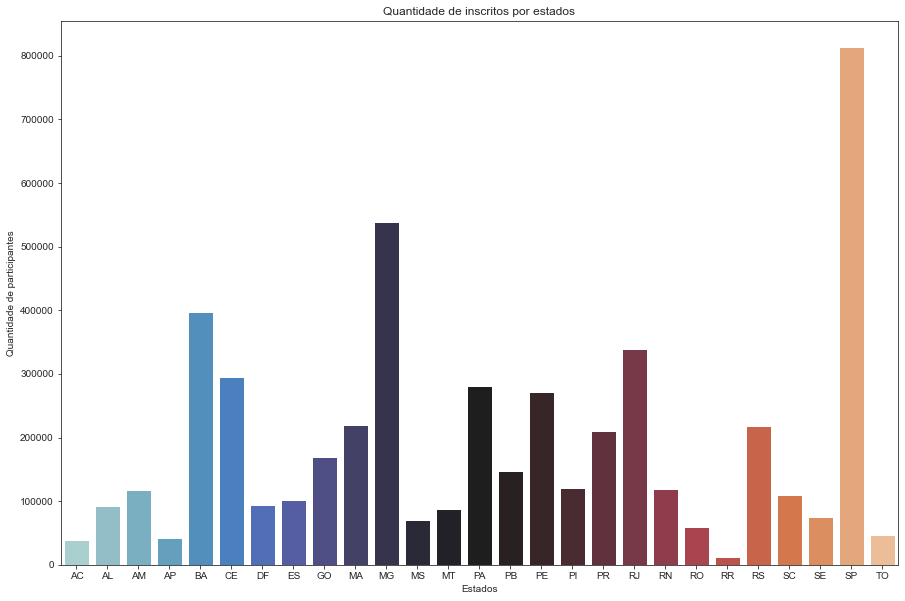

In [8]:
plt.figure(figsize=(15,10))
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.barplot(x=sigla_estado, y=estudante_por_estado, data=df2019, palette='icefire')
plt.title("Quantidade de inscritos por estados")
plt.xlabel("Estados")
plt.ylabel("Quantidade de participantes")

In [ ]:
df_full.loc[df_full.NU_ANO==2018]

In [ ]:
df2018.head()

In [ ]:
(agg_estudantes_estados_2019-agg_estudantes_estados_2018)/agg_estudantes_estados_2018*100

In [ ]:
df2019[provas].describe()

Text(0, 0.5, 'Quantidade')

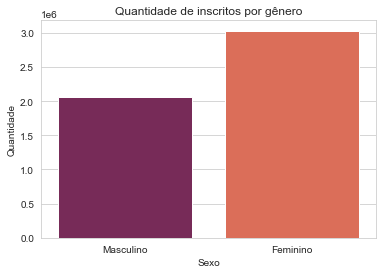

In [9]:
#Visualização distribuição por gênero
sns.set_style('whitegrid')
sns.countplot(x='TP_SEXO',data=df2019,palette="rocket")
plt.title("Quantidade de inscritos por gênero")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")

<AxesSubplot:xlabel='TP_ESTADO_CIVIL', ylabel='count'>

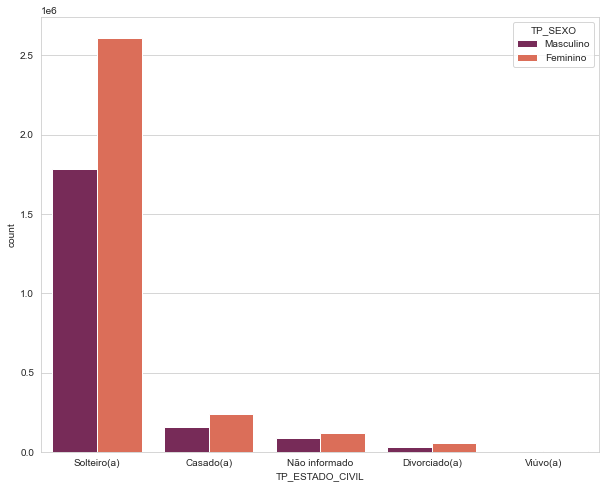

In [10]:
#Distribuição por gênero e estado civil
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='TP_ESTADO_CIVIL', hue='TP_SEXO', data=df2019, palette="rocket")

In [11]:
mean_per_gender = df2019.groupby(['TP_SEXO']).mean()['NU_NOTA_FINAL']
mean_per_gender.sort_values()

TP_SEXO
Feminino     514.371
Masculino    525.790
Name: NU_NOTA_FINAL, dtype: float64

# Participantes novos e suas comparações com os mais antigos

In [ ]:
# df = df2019.query("TP_ANO_CONCLUIU != 0")

In [12]:
df2019['TP_ANO_CONCLUIU'] = df2019.TP_ANO_CONCLUIU.astype(int,errors='ignore')

<AxesSubplot:xlabel='TP_ANO_CONCLUIU'>

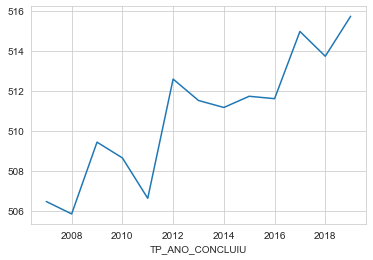

In [13]:
df2019.query("TP_ANO_CONCLUIU != 0").groupby('TP_ANO_CONCLUIU').NU_NOTA_FINAL.median().sort_index().plot()

In [19]:
#Passando os anos para uma variável

year = df2019['TP_ANO_CONCLUIU'].unique()
year.sort()

Text(0.5, 0, 'Ano de conclusão do ensino médio')

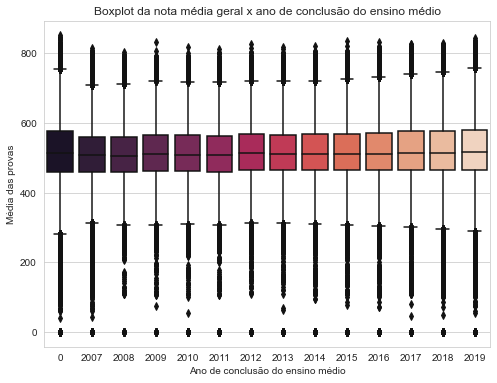

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='TP_ANO_CONCLUIU', y = "NU_NOTA_FINAL", data = df2019, palette='rocket', order=year)
plt.title("Boxplot da nota média geral x ano de conclusão do ensino médio")
plt.ylabel("Média das provas")
plt.xlabel("Ano de conclusão do ensino médio")

In [ ]:
df2019.query("TP_ANO_CONCLUIU != 0").groupby('TP_ANO_CONCLUIU').NU_NOTA_FINAL.median().sort_index()

In [ ]:
#Váriavel de idade

plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')
plt.hist(df2019['NU_IDADE'], 10, rwidth=0.6,)

# Variaveis para casos com algum tipo de deficiencia


In [14]:
#Validando o desempenho dos participantes com doença mental

df2019.groupby(['IN_DEFICIENCIA_MENTAL']).mean()["NU_NOTA_FINAL"].sort_index()

IN_DEFICIENCIA_MENTAL
0    519.039
1    412.266
Name: NU_NOTA_FINAL, dtype: float64

In [16]:
#Consultando o desempenho dos participantes com autismo

df2019.groupby(['IN_AUTISMO']).mean()["NU_NOTA_FINAL"].sort_index()

IN_AUTISMO
0    519.000
1    486.751
Name: NU_NOTA_FINAL, dtype: float64

# Vamos verificar a reda do canidato, se influencia em alguma coisa a sua nota

In [24]:
#Criando variável com a renda ordenada

renda_ordenada = df2019["Q006"].unique()
renda_ordenada.sort()

Text(0.5, 0, 'Renda')

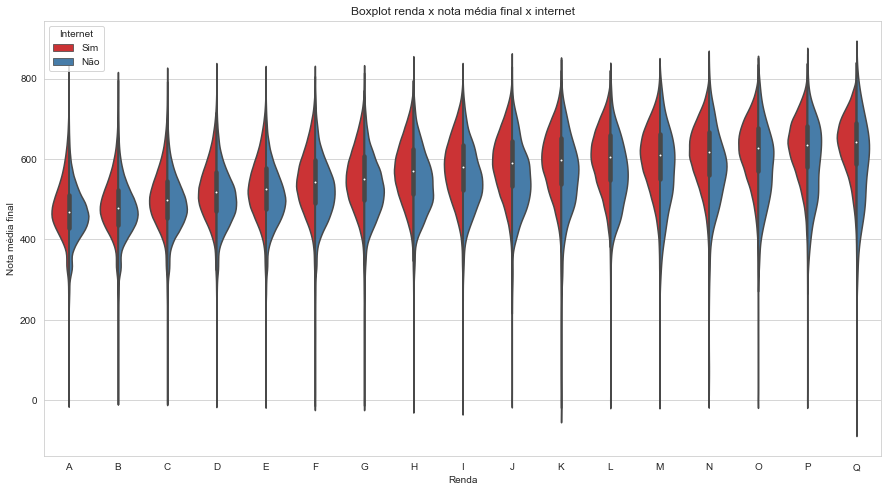

In [26]:
#Plot da renda do canditado x nota final x internet
df2019['Internet'] = df2019['Q025'].replace(['A','B'],['Não','Sim'])
plt.figure(figsize=(15,8))
sns.violinplot(x="Q006", y="NU_NOTA_FINAL", data=df2019,hue='Internet',split=True,palette='Set1',order=renda_ordenada)
plt.title("Boxplot renda x nota média final x internet")
plt.ylabel("Nota média final")
plt.xlabel("Renda")